Contains all tests for Project 3, FYS-STK4155

In [6]:
from imports import *
from functions import analytical_diffusion, forward_Euler
from classes import PINN
import imports
import functions
import importlib
import classes

importlib.reload(imports)
importlib.reload(functions)
importlib.reload(classes)

<module 'classes' from 'c:\\Users\\Jogga\\Documents\\H25\\FYS-STK4155\\Project-3\\Code\\classes.py'>

Testing the analyical solution

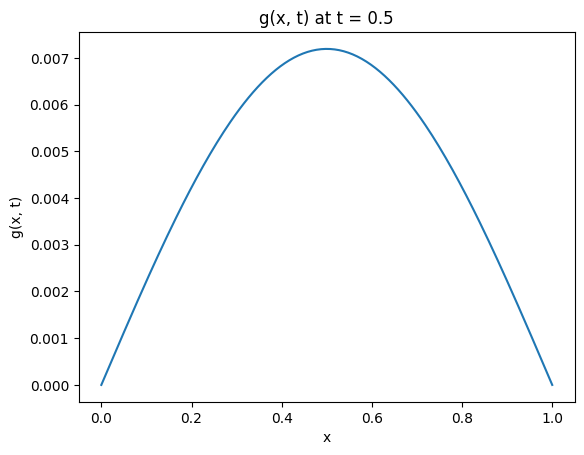

In [7]:
x = np.linspace(0, 1, 200)
t = 0.5
y = analytical_diffusion(x, t)

plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("g(x, t)")
plt.title(f"g(x, t) at t = {t}")
plt.show()

Testing the Forward Euler against analytical solution

c:\Users\Jogga\Documents\H25\FYS-STK4155\Project-3\Code\functions.py:46: RuntimeWarning: overflow encountered in divide
  
c:\Users\Jogga\Documents\H25\FYS-STK4155\Project-3\Code\functions.py:51: RuntimeWarning: invalid value encountered in add
  u_new = u.copy()


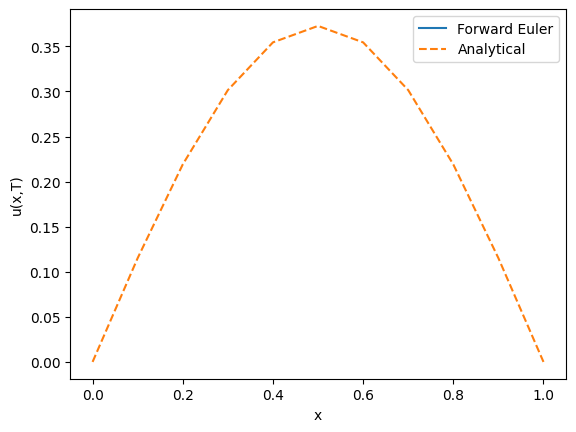

MSE: nan


In [11]:
T  = 0.1
Nt = 200
Nx = 50

x, t, U = forward_Euler(T, Nt, Nx)

u_FE = U[-1, :]
u_exact = np.exp(-np.pi**2 * T) * np.sin(np.pi * x)

plt.plot(x, u_FE, label="Forward Euler")
plt.plot(x, u_exact, "--", label="Analytical")
plt.xlabel("x")
plt.ylabel("u(x,T)")
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
mse = np.mean((u_FE- u_exact)**2)

print(f"MSE: {mse:.6e}")

**(b)**: testing for different displacement steps $\Delta x$, and studying solutions

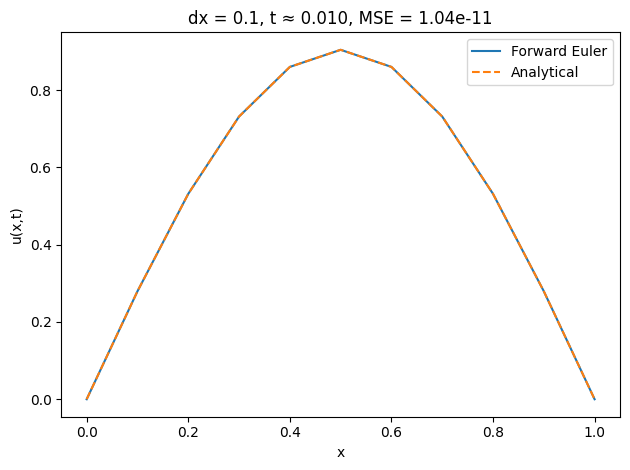

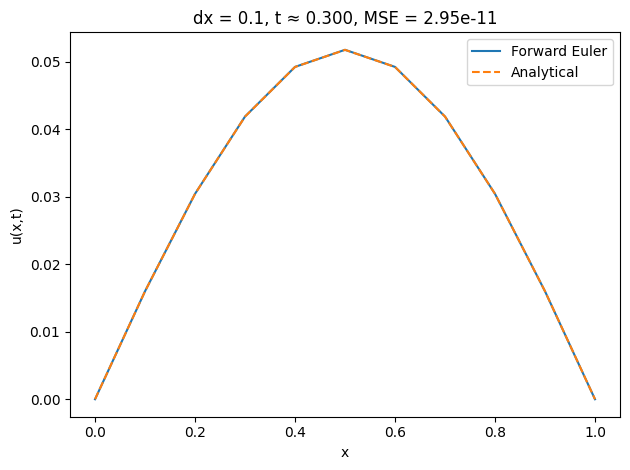

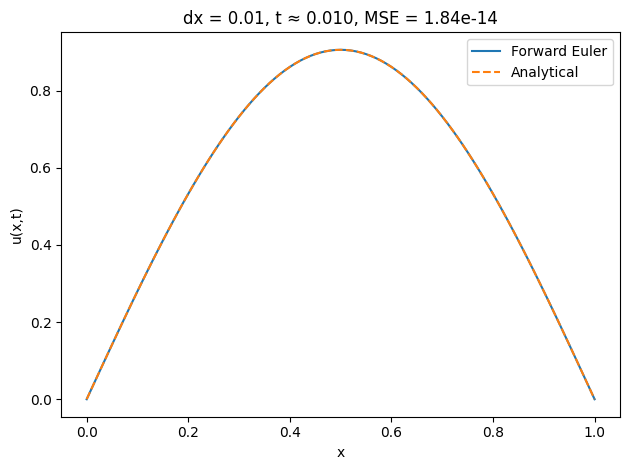

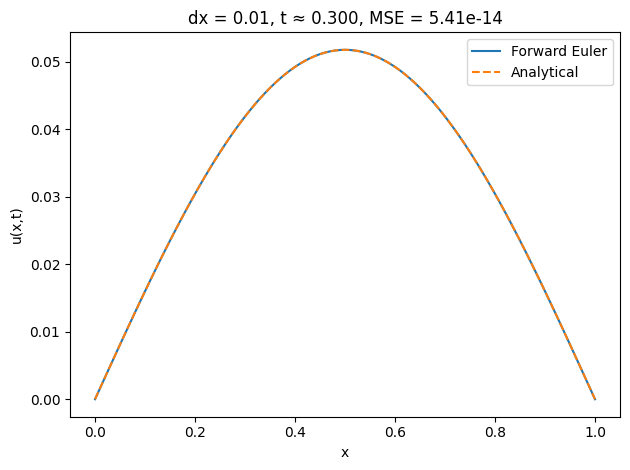

In [110]:
dx_values = [0.1, 0.01]
t1 = 0.01
t2 = 0.3
T_final = t2
alpha = 0.5

for dx in dx_values:
    x, t, U = forward_Euler(dx, T_final, alpha=alpha)

    idx1 = np.argmin(np.abs(t - t1))
    u_num_t1 = U[idx1, :]
    u_ex_t1 = analytical_diffusion(x, t[idx1])
    mse_t1 = np.mean((u_num_t1 - u_ex_t1)**2)

    plt.figure()
    plt.plot(x, u_num_t1, label="Forward Euler")
    plt.plot(x, u_ex_t1, "--", label="Analytical")
    plt.xlabel("x")
    plt.ylabel("u(x,t)")
    plt.title(f"dx = {dx}, t ≈ {t[idx1]:.3f}, MSE = {mse_t1:.2e}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    idx2 = np.argmin(np.abs(t - t2))
    u_num_t2 = U[idx2, :]
    u_ex_t2 = analytical_diffusion(x, t[idx2])
    mse_t2 = np.mean((u_num_t2 - u_ex_t2)**2)

    plt.figure()
    plt.plot(x, u_num_t2, label="Forward Euler")
    plt.plot(x, u_ex_t2, "--", label="Analytical")
    plt.xlabel("x")
    plt.ylabel("u(x,t)")
    plt.title(f"dx = {dx}, t ≈ {t[idx2]:.3f}, MSE = {mse_t2:.2e}")
    plt.legend()
    plt.tight_layout()
    plt.show()




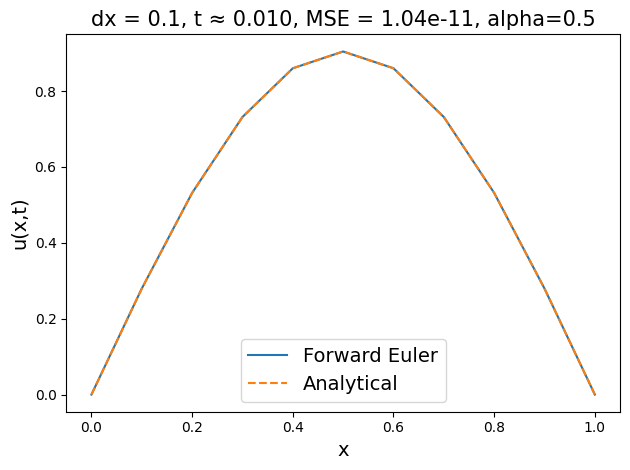

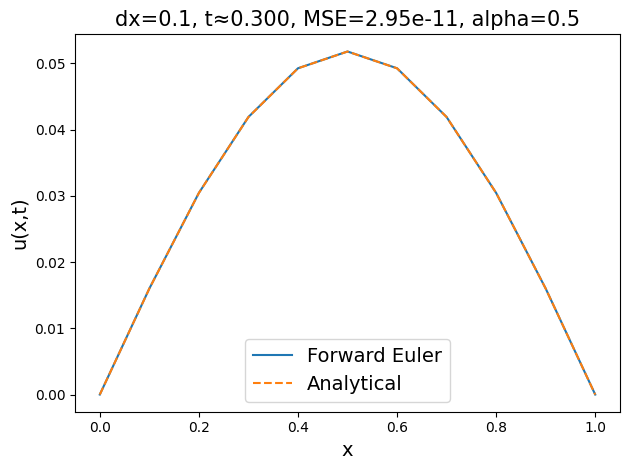

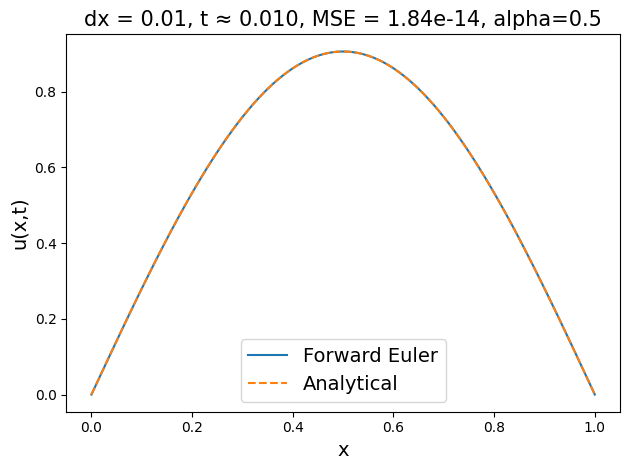

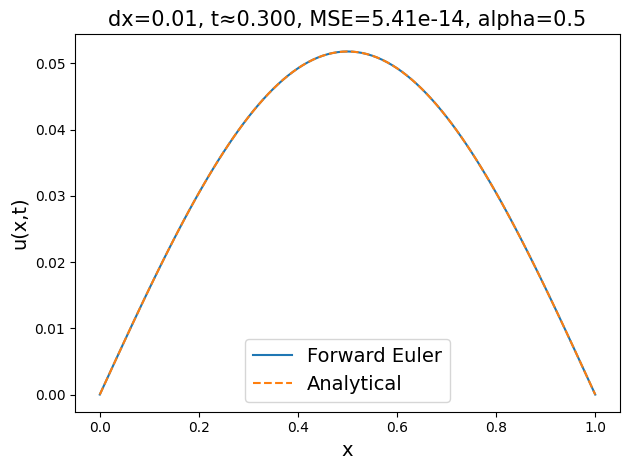

In [90]:
dx_values = [0.1, 0.01]
t1 = 0.01
t2 = 0.3
T_final = t2
alpha = 0.5

for dx in dx_values:
    x, t, U = forward_Euler(dx, T_final, alpha=alpha)

    idx1 = np.argmin(np.abs(t - t1))
    u_num_t1 = U[idx1, :]
    u_ex_t1 = analytical_diffusion(x, t[idx1])
    mse_t1 = np.mean((u_num_t1 - u_ex_t1)**2)

    plt.figure()
    plt.plot(x, u_num_t1, label="Forward Euler")
    plt.plot(x, u_ex_t1, "--", label="Analytical")
    plt.xlabel("x", fontsize=14)
    plt.ylabel("u(x,t)", fontsize=14)
    plt.title(f"dx = {dx}, t ≈ {t[idx1]:.3f}, MSE = {mse_t1:.2e}, alpha={alpha}", fontsize=15)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()

    idx2 = np.argmin(np.abs(t - t2))
    u_num_t2 = U[idx2, :]
    u_ex_t2 = analytical_diffusion(x, t[idx2])
    mse_t2 = np.mean((u_num_t2 - u_ex_t2)**2)

    plt.figure()
    plt.plot(x, u_num_t2, label="Forward Euler")
    plt.plot(x, u_ex_t2, "--", label="Analytical")
    plt.xlabel("x", fontsize=14)
    plt.ylabel("u(x,t)", fontsize=14)
    plt.title(f"dx={dx}, t≈{t[idx2]:.3f}, MSE={mse_t2:.2e}, alpha={alpha}", fontsize=15)
    plt.legend(fontsize=14)
    plt.tight_layout()
    plt.show()

Tests for numerical stability

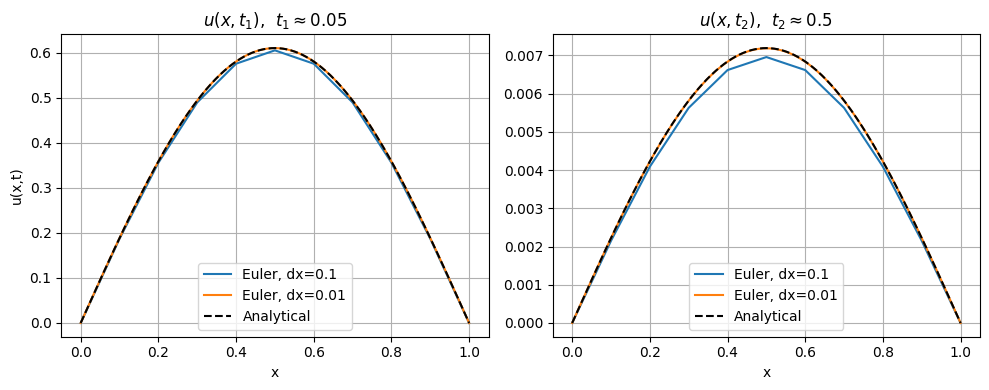

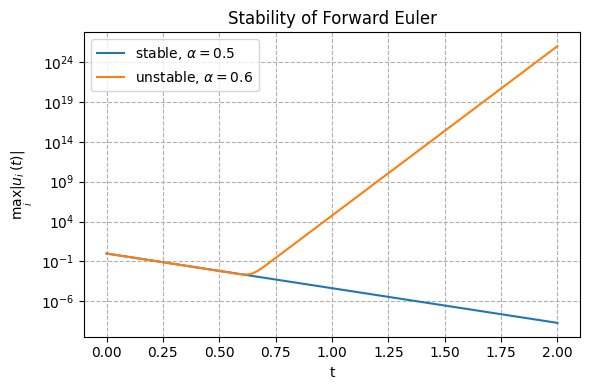

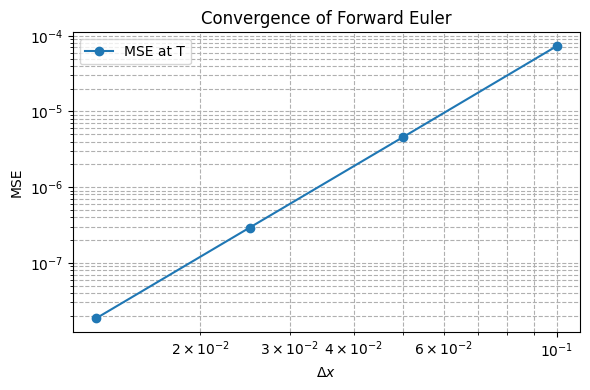

C:\Users\Jogga\AppData\Local\Temp\ipykernel_32908\2705278928.py:134: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


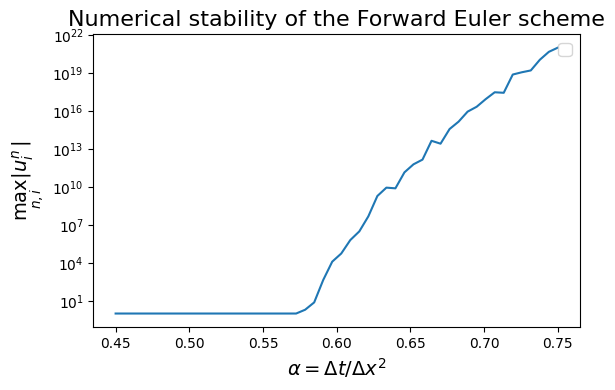

In [ ]:

def nearest_index(t_array, t_target):
    return np.argmin(np.abs(t_array - t_target))




def test_profiles():
    dx_list = [0.1, 0.01]
    T = 0.5
    t1_target = 0.05
    t2_target = 0.5

    results = []
    for dx in dx_list:
        x, t, U = forward_Euler(dx, T, alpha=0.5)
        i1 = nearest_index(t, t1_target)
        i2 = nearest_index(t, t2_target)
        results.append((dx, x, t, U, i1, i2))

    plt.figure(figsize=(10, 4))

 
    plt.subplot(1, 2, 1)
    for dx, x, t, U, i1, i2 in results:
        plt.plot(x, U[i1, :], label=f"Euler, dx={dx}")
    x_fine = np.linspace(0, 1, 500)
    plt.plot(x_fine, analytical_diffusion(x_fine, t1_target),
             "k--", label="Analytical")
    plt.title(rf"$u(x,t_1)$,  $t_1 \approx {t1_target}$")
    plt.xlabel("x")
    plt.ylabel("u(x,t)")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    for dx, x, t, U, i1, i2 in results:
        plt.plot(x, U[i2, :], label=f"Euler, dx={dx}")
    plt.plot(x_fine, analytical_diffusion(x_fine, t2_target),
             "k--", label="Analytical")
    plt.title(rf"$u(x,t_2)$,  $t_2 \approx {t2_target}$")
    plt.xlabel("x")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()




def test_stability():
    dx = 0.1
    T = 2.0

    x_s, t_s, U_s = forward_Euler(dx, T, alpha=0.5)  # stable
    x_u, t_u, U_u = forward_Euler(dx, T, alpha=0.6)  # unstable

    A_s = np.max(np.abs(U_s), axis=1)
    A_u = np.max(np.abs(U_u), axis=1)

    plt.figure(figsize=(6, 4))
    plt.semilogy(t_s, A_s, label=r"stable, $\alpha=0.5$")
    plt.semilogy(t_u, A_u, label=r"unstable, $\alpha=0.6$")
    plt.xlabel("t")
    plt.ylabel(r"$\max_i |u_i(t)|$")
    plt.title("Stability of Forward Euler")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()




def test_convergence():
    dx_list = [1/10, 1/20, 1/40, 1/80]
    T = 0.1
    errors = []

    for dx in dx_list:
        x, t, U = forward_Euler(dx, T, alpha=0.5)
        u_num = U[-1, :]
        u_exact = analytical_diffusion(x, T)
        mse = np.mean((u_num - u_exact)**2)
        errors.append(mse)

    dx_arr = np.array(dx_list)
    err_arr = np.array(errors)

    plt.figure(figsize=(6, 4))
    plt.loglog(dx_arr, err_arr, "o-", label="MSE at T")
    plt.xlabel(r"$\Delta x$")
    plt.ylabel("MSE")
    plt.title("Convergence of Forward Euler")
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.tight_layout()
    plt.show()

max_amplitude = np.max(np.abs(U))
def test_alpha_stability():
    dx = 0.1
    T = 1.0

    alphas = np.linspace(0.45, 0.75, 50)
    max_amplitudes = []

    for alpha in alphas:
        x, t, U = forward_Euler(dx, T, alpha=alpha)
        max_amplitudes.append(np.max(np.abs(U)))

    max_amplitudes = np.array(max_amplitudes)

    plt.figure(figsize=(6, 4))
    plt.semilogy(alphas, max_amplitudes)
    plt.xlabel(r"$\alpha = \Delta t / \Delta x^2$", fontsize=14)
    plt.ylabel(r"$\max_{n,i} |u_i^n|$", fontsize=14)
    plt.title("Numerical stability of the Forward Euler scheme", fontsize=16)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()




test_profiles()
test_stability()
test_convergence()
test_alpha_stability()


Homemade PINN


=== Experiment: 2×20 tanh ===
Layers: [2, 20, 20, 1], activation: tanh
Epoch     0 | Loss = 2.600e+01
Epoch   500 | Loss = 6.855e+00
Epoch  1000 | Loss = 6.506e+00
Epoch  1500 | Loss = 6.405e+00
MSE vs analytical at t=0.1: 3.757e-02


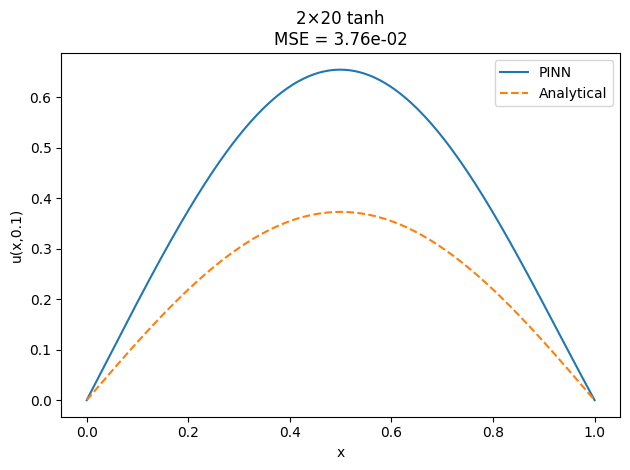


=== Experiment: 2×50 tanh ===
Layers: [2, 50, 50, 1], activation: tanh
Epoch     0 | Loss = 2.827e+01
Epoch   500 | Loss = 6.574e+00
Epoch  1000 | Loss = 3.922e+00
Epoch  1500 | Loss = 3.623e-01
MSE vs analytical at t=0.1: 4.125e-05


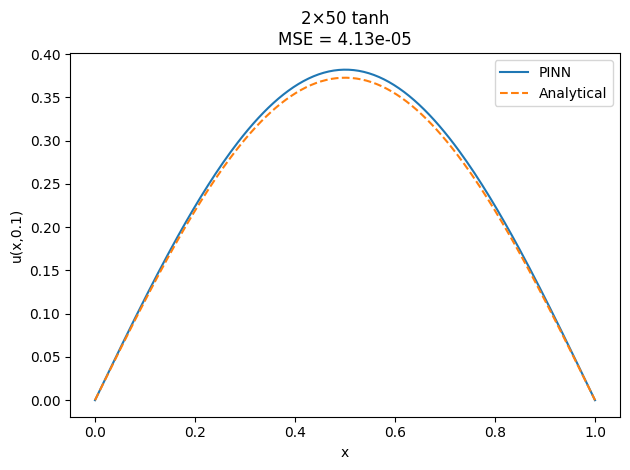


=== Experiment: 2×20 ReLU ===
Layers: [2, 20, 20, 1], activation: relu
Epoch     0 | Loss = 2.566e+01
Epoch   500 | Loss = 6.381e+00
Epoch  1000 | Loss = 1.452e+00
Epoch  1500 | Loss = 9.427e-01
MSE vs analytical at t=0.1: 9.835e-04


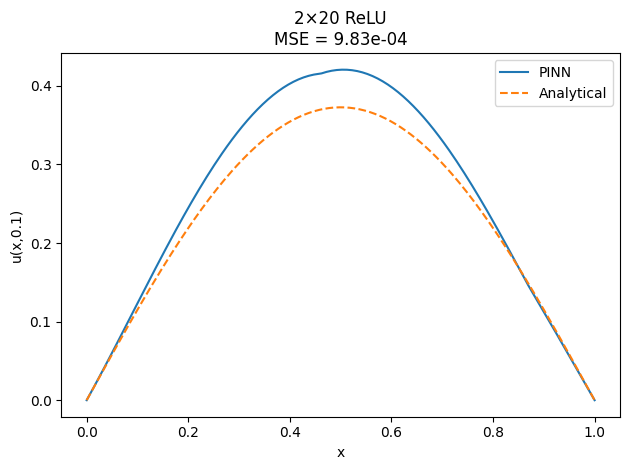


=== Experiment: 3×50 ReLU ===
Layers: [2, 50, 50, 50, 1], activation: relu
Epoch     0 | Loss = 2.687e+01
Epoch   500 | Loss = 2.695e-01
Epoch  1000 | Loss = 1.103e+00
Epoch  1500 | Loss = 6.700e-01
MSE vs analytical at t=0.1: 2.894e-04


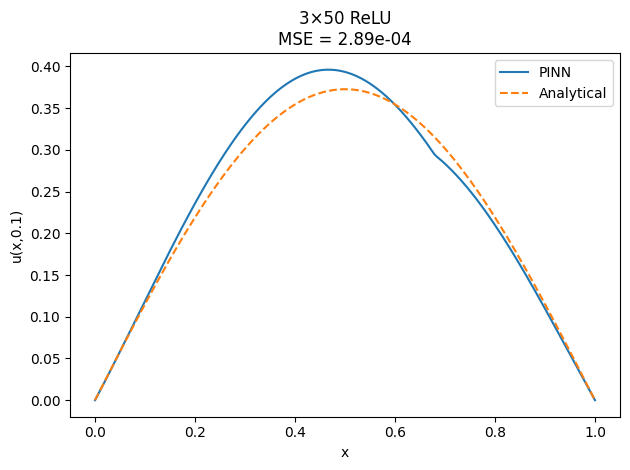


=== Experiment: 2×20 tanh ===
Layers: [2, 20, 20, 1], activation: sigmoid
Epoch     0 | Loss = 2.451e+01
Epoch   500 | Loss = 7.696e+00
Epoch  1000 | Loss = 7.560e+00
Epoch  1500 | Loss = 7.445e+00
MSE vs analytical at t=0.1: 4.271e-02


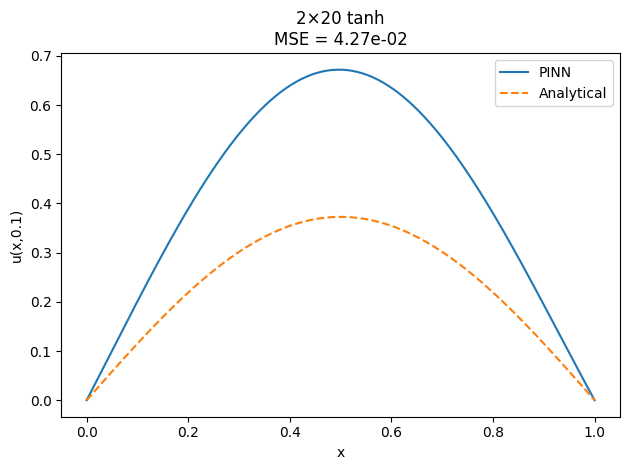


=== Experiment: 2×50 tanh ===
Layers: [2, 50, 50, 1], activation: sigmoid
Epoch     0 | Loss = 2.847e+01
Epoch   500 | Loss = 7.595e+00
Epoch  1000 | Loss = 7.546e+00
Epoch  1500 | Loss = 7.002e+00
MSE vs analytical at t=0.1: 3.832e-02


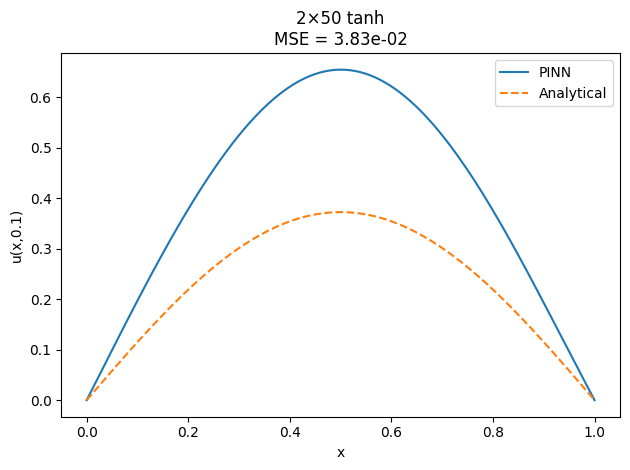


=== Experiment: 2×20 GeLU ===
Layers: [2, 20, 20, 1], activation: gelu
Epoch     0 | Loss = 2.692e+01
Epoch   500 | Loss = 5.528e+00
Epoch  1000 | Loss = 8.695e-01
Epoch  1500 | Loss = 2.449e-01
MSE vs analytical at t=0.1: 3.195e-06


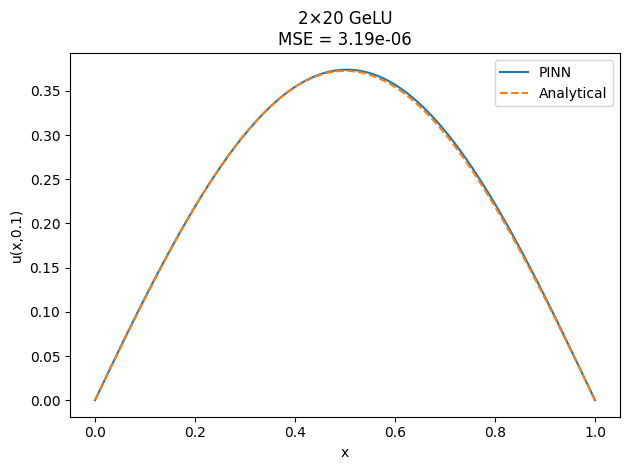


=== Experiment: 3×50 GeLU ===
Layers: [2, 50, 50, 50, 1], activation: gelu
Epoch     0 | Loss = 2.637e+01
Epoch   500 | Loss = 5.641e-01
Epoch  1000 | Loss = 1.944e-02
Epoch  1500 | Loss = 6.860e-03
MSE vs analytical at t=0.1: 1.853e-06


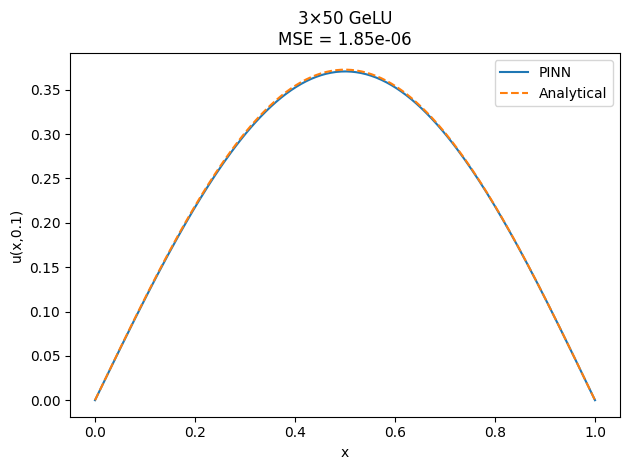

In [ ]:
def make_collocation(Nx=50, Nt=50, T=0.3):
    x = torch.linspace(0.0, 1.0, Nx)
    t = torch.linspace(0.0, T, Nt)
    X, Tm = torch.meshgrid(x, t, indexing="ij")
    x_coll = X.reshape(-1, 1)
    t_coll = Tm.reshape(-1, 1)
    return x_coll, t_coll



def analytical_u(x, t_scalar):
    x_np = x.detach().cpu().numpy().flatten()
    return np.exp(-np.pi**2 * t_scalar) * np.sin(np.pi * x_np)



def run_experiment(layers, activation, label,
                   Nx=50, Nt=50, T=0.3,
                   epochs=3000, lr=1e-3,
                   t_eval=0.1):
    print(f"\n=== Experiment: {label} ===")
    print(f"Layers: {layers}, activation: {activation}")

    x_coll, t_coll = make_collocation(Nx=Nx, Nt=Nt, T=T)
    model = PINN(layers=layers, activation=activation)

    model.train_pinn(x_coll, t_coll, epochs=epochs, lr=lr, verbose_every=500)

    with torch.no_grad():
        x_test = torch.linspace(0, 1, 200).reshape(-1, 1)
        t_test = torch.full_like(x_test, t_eval)
        u_pinn = model.trial_solution(x_test, t_test).cpu().numpy().flatten()

    u_exact = analytical_u(x_test, t_eval)
    mse = np.mean((u_pinn - u_exact)**2)
    print(f"MSE vs analytical at t={t_eval}: {mse:.3e}")

    plt.figure()
    plt.plot(x_test.cpu().numpy(), u_pinn, label="PINN")
    plt.plot(x_test.cpu().numpy(), u_exact, "--", label="Analytical")
    plt.xlabel("x")
    plt.ylabel(f"u(x,{t_eval})")
    plt.title(f"{label}\nMSE = {mse:.2e}")
    plt.legend()
    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    configs = [
        {"layers": [2, 20, 20, 1], "activation": "tanh",   "label": "2×20 tanh"},
        {"layers": [2, 50, 50, 1], "activation": "tanh",   "label": "2×50 tanh"},
        {"layers": [2, 20, 20, 1], "activation": "relu",   "label": "2×20 ReLU"},
        {"layers": [2, 50, 50, 50, 1], "activation": "relu", "label": "3×50 ReLU"},
        {"layers": [2, 20, 20, 1], "activation": "sigmoid",   "label": "2×20 tanh"},
        {"layers": [2, 50, 50, 1], "activation": "sigmoid",   "label": "2×50 tanh"},
        {"layers": [2, 20, 20, 1], "activation": "gelu",   "label": "2×20 GeLU"},
        {"layers": [2, 50, 50, 50, 1], "activation": "gelu", "label": "3×50 GeLU"},
    ]

    for cfg in configs:
        run_experiment(
            layers=cfg["layers"],
            activation=cfg["activation"],
            label=cfg["label"],
            Nx=40,
            Nt=40,
            T=0.3,
            epochs=2000,   
            lr=1e-3,
            t_eval=0.1
        )


Animation of the solution in 3D

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D 

L = 1.0
Nx = 200
Nt = 200
x = np.linspace(0, L, Nx)
t_max = 1
t = np.linspace(0, t_max, Nt)

X, T = np.meshgrid(x, t)

U = np.exp(-np.pi**2 * T) * np.sin(np.pi * X)


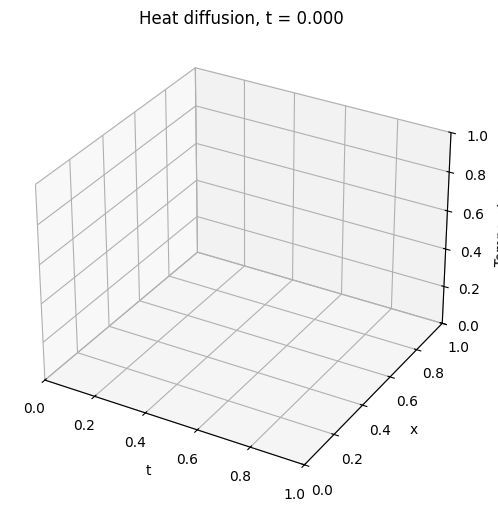

In [9]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.set_xlim(0, L)
ax.set_ylim(0, t_max)
ax.set_zlim(0, 1)
ax.set_ylabel("x")
ax.set_xlabel("t")
ax.set_zlabel("Temperature")

surf = None 

def update(frame):
    global surf
    if surf is not None:
        surf.remove()   

    surf = ax.plot_surface(
        T[:frame+1],
        X[:frame+1],
        U[:frame+1],
        cmap="viridis"
    )
    ax.set_title(f"Heat diffusion, t = {t[frame]:.3f}")
    return surf,

ani = animation.FuncAnimation(
    fig,
    update,
    frames=Nt,
    interval=50,
    blit=False
)



Animation of the rod in 3D

Epoch     0 | Loss = 2.098e+01
Epoch   500 | Loss = 3.050e-01
Epoch  1000 | Loss = 8.931e-02
Epoch  1500 | Loss = 5.128e-02
Epoch  2000 | Loss = 2.516e-02
Epoch  2500 | Loss = 1.963e-02
Epoch  3000 | Loss = 1.546e-02
Epoch  3500 | Loss = 1.442e-02
Epoch  4000 | Loss = 1.553e-02
Epoch  4500 | Loss = 1.336e-02


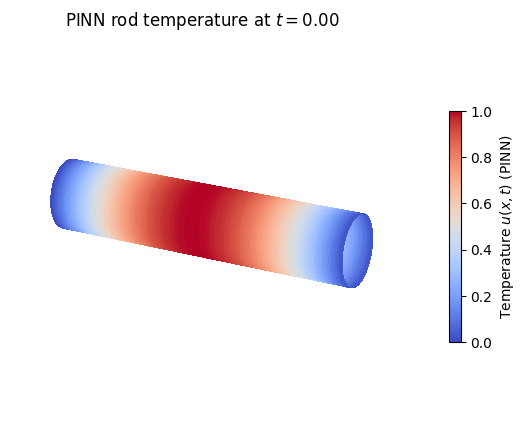

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D  

import torch


layers = [2, 200, 200, 200, 200, 200, 1]
activation = "gelu"
device = "cpu"   

pinn = PINN(layers=layers, activation=activation, device=device)


N_coll = 100
t_max = 0.4  

x_coll = torch.rand(N_coll, 1, device=pinn.device)
t_coll = torch.rand(N_coll, 1, device=pinn.device) * t_max

pinn.train_pinn(
    x_coll,
    t_coll,
    epochs=5000,
    lr=1e-4,
    verbose_every=500   
)

pinn.eval()
param_dtype = next(pinn.parameters()).dtype

def u_pinn_1d(x, t):
    """
    Evaluate u(x,t) from the trained PINN.
    x : 1D numpy array
    t : scalar
    """
    x_np = np.asarray(x, dtype=np.float32)
    xT = torch.tensor(x_np, device=pinn.device, dtype=param_dtype).reshape(-1, 1)
    tT = torch.full_like(xT, float(t))
    with torch.no_grad():
        u = pinn.trial_solution(xT, tT)
    return u.cpu().numpy().flatten()


L = 1.0     
R = 0.1    
Nx = 120  
Ntheta = 80 

x = np.linspace(0.0, L, Nx)
theta = np.linspace(0.0, 2*np.pi, Ntheta)

X, Theta = np.meshgrid(x, theta, indexing="ij")   
Y = R * np.cos(Theta)
Z = R * np.sin(Theta)



t_min, t_max = 0.0, 0.4
N_frames = 100
t_vals = np.linspace(t_min, t_max, N_frames)


vmin, vmax = 0.0, 1.0   
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=vmin, vmax=vmax)



fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

t0 = t_vals[0]
u_x0 = u_pinn_1d(x, t0)              
U0 = np.tile(u_x0[:, None], (1, Ntheta))  

U0_faces = U0[:-1, :-1]
colors0 = cmap(norm(U0_faces))

surf = ax.plot_surface(
    X, Y, Z,
    facecolors=colors0,
    rstride=1, cstride=1,
    linewidth=0, antialiased=False
)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title(f"PINN rod temperature at $t = {t0:.2f}$")
ax.set_box_aspect((L, 2*R, 2*R))
ax.set_axis_off()
ax.view_init(elev=20, azim=-60)

mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array([])
cb = fig.colorbar(mappable, ax=ax, shrink=0.6, pad=0.1)
cb.set_label("Temperature $u(x,t)$ (PINN)")


def update(frame):
    t = t_vals[frame]

    u_x = u_pinn_1d(x, t)
    U = np.tile(u_x[:, None], (1, Ntheta))

    U_faces = U[:-1, :-1]
    colors = cmap(norm(U_faces))

    surf.set_facecolors(colors.reshape(-1, 4))
    ax.set_title(f"PINN rod temperature at $t = {t:.2f}$")
    return (surf,)

ani = animation.FuncAnimation(
    fig, update, frames=N_frames, interval=80, blit=False
)

from IPython.display import HTML
HTML(ani.to_jshtml())


In [129]:
from matplotlib.animation import PillowWriter

writer = PillowWriter(fps=20)
ani.save("heat_pole.gif", writer=writer)

In [133]:
import imageio
import os
import matplotlib.pyplot as plt

gif = imageio.mimread("heat_pole.gif")

os.makedirs("frames", exist_ok=True)

for i, frame in enumerate(gif):
    plt.figure(figsize=(5,4))
    plt.imshow(frame)
    plt.axis("off")
    plt.savefig(f"frames/frame_{i:03d}.pdf", bbox_inches="tight")
    plt.close()


In [4]:
from PIL import Image
import os

gif = Image.open("heat_rod.gif")

outdir = "heat_png"
os.makedirs(outdir, exist_ok=True)

for i in range(gif.n_frames):
    gif.seek(i)
    frame = gif.convert("RGBA")
    frame.save(f"{outdir}/heat_{i:03d}.png")

print(f"Saved {gif.n_frames} PNGs to '{outdir}/'")


Saved 200 PNGs to 'heat_png/'
